<a href="https://colab.research.google.com/github/francokrepel/NetherPortalCalculator/blob/master/Assignment1_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/assignment_1_files/data.csv')
df = df.drop(df.columns[-1], axis = 1)
df.head(10)

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error
0,1,84,254,0,3,2
1,0,58,247,0,6,9
2,0,56,125,1,6,8
3,0,55,22,0,11,7
4,1,95,262,0,2,3
5,0,71,113,1,8,9
6,0,76,91,1,6,3
7,0,64,46,0,6,11
8,0,56,132,0,9,9
9,0,96,190,0,11,4


In [ ]:
df.isna().sum()

Purchase        0
SUS             0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

In [ ]:
# compute pair-wise correlation: identify potentially highly correlated redundant or irrelevant features that may not contribute much to the accuracy of the model. 
# important because including too many irrelevant features can lead to overfitting, where the model too complex and fits the training data too closely, resulting in poor generalization to new data.
df.corr(method='pearson')['SUS'].sort_values(0)

<ipython-input-4-901d31ac8b77>:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  df.corr(method='pearson')['SUS'].sort_values(0)


Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64

In [ ]:
# looks like ASR_Error and Intent_Error are strong negative correlations with the SUS score, but whether user made a purchase using siri has a strong positive correlation, this makes logical sense

# Distributions

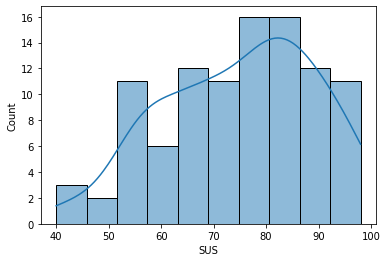

In [ ]:
# lets see the distribution of our SUS
sns.histplot(data=df['SUS'], palette='bright', bins=10, kde=True)
plt.show()

In [ ]:
# Data looks decently distributed, slightly skewed to the higher ratings

Let us plot some of these distributions of errors

Text(0.5, 1.0, 'Purchase Distribution')

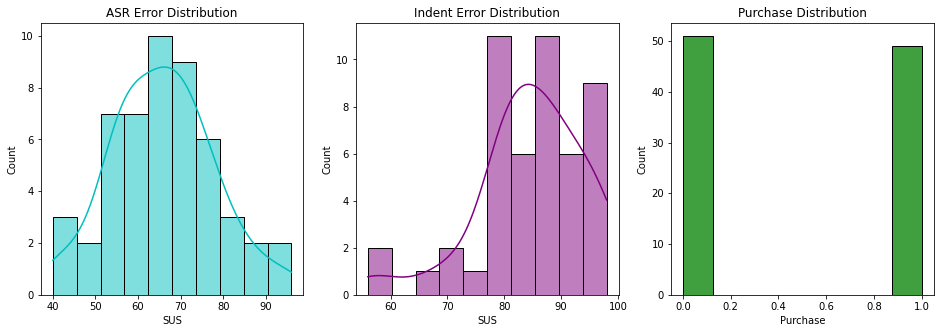

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(16,5))

sns.histplot(df.loc[df['Purchase'] == 0]['SUS'], kde=True, bins=10, color='c', ax=axs[0])
axs[0].set_title('ASR Error Distribution')
sns.histplot(df.loc[df['Purchase'] == 1]['SUS'], kde=True, bins=10, color='purple', ax=axs[1])
axs[1].set_title('Indent Error Distribution')
sns.histplot(data=df, x='Purchase', color='green', ax=axs[2])
axs[2].set_title('Purchase Distribution')

In [ ]:
# looks like our features are well distributed, and Purchase counts are quite even.

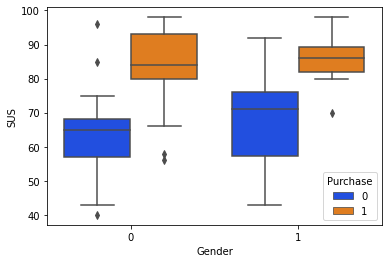

In [ ]:
# lets try and compare the SUS rating changes by the gender of the user
sns.boxplot(x="Gender", y="SUS", hue="Purchase", data=df, palette='bright')
plt.show()

In [ ]:
# looks logical, men do have slightly higher average ranges when NOT purchased, and women seem to have slightly higer SUS ranges when they DO purchase an item
# However, makes logical sense that gender doesnt really influence this SUS decision that much

OLS:

In [ ]:
import statsmodels.api as sm
# label
y = df['SUS']
#data
x = df.drop('SUS', axis = 1)

In [ ]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        20:36:53   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2) The significant features are "ASR_Error" and "Intent_Error" since they have p-values less than the significance level of 0.05. The coefficients for these features are also negative, which indicates that with number of ASR errors and intent errors increasing, the SUS score decreases.

On the other hand, the features "Purchase," "Duration," and "Gender" are not statistically significant since their p-values are greater than 0.05. This suggests that there is no strong evidence to suggest that these features have a significant relationship with SUS in this model. 

3) ASR_Error: The negative coefficient of -1.4254 suggests that as the ASR errors decreases the System Usability Survey scores (SUS) increase. I believe this result is consistent with our expectation as users might get frustrated if Siri fails to recognize their speech, resulting in a lower SUS score.

Intent_Error: The negative coefficient of -2.0092 suggests that increasing the number of Intent_Errors decreases the SUS score. This result is also consistent with our expectation as users might get frustrated if Siri fails to classify their speech intentions, also resulting in a lower SUS score.

Duration: The coefficient of -0.0002 suggests that the duration of the dialogue between Siri and the user has no significant impact on the SUS score. This result is unexpected as longer dialogue duration might lead to a more complex interaction, which could potentially affect the SUS score. However, since it diesnt directly determine how staisfied the users were with the interaction, it could make sense that it doesnt have much of an impact

Gender: The positive coefficient of 0.8367 suggests that there is a slight positive relationship between male gender and the SUS score. However, the P-value of 0.672 indicates that this relationship is not statistically significant. This result is consistent with expectations as gender shouldnt really impact whether one is satisfied with their Siri interactions.

Purchase: The coefficient of 1.3412 suggests that the Purchase feature has no significant impact on the SUS score. This result is one however that was unexpected as the ability to purchase a ticket through Siri might increase the usability of the system and the result in a higher SUS score. However, the high P-value of 0.716 indicates that the relationship between the Purchase feature and SUS score is not statistically significant.

4) The model suggests that "Intent_Error" is the most influential factor on SUS since it has the largest coefficient (-2.0092) compared all the other independent variables in the model. The negative sign of the coefficient indicates that as the number of intent errors increases, the SUS score decreases, which we mentioned aligns with our predictions.

Additionally, the statistical significance of the coefficient is evident due to its low p-value (less than 0.001). This means that there is strong evidence to suggest that the relationship between intent errors and SUS is not due to natural chance.

Therefore, based on the coefficient size and statistical significance, we can conclude that "Intent_Error" is the most influential factor on SUS in this model.

5) As mentioned before, the potential reason for Intent Error and ASR Error being the most significant predictors of SUS may have to do with how the user feels when interacting with Siri;

ASR_Error: Automatic Speech Recognition errors occur when Siri fails to recognize the user's speech accurately. This can definately lead to frustration and confusion from the user and end up negatively impact their perception of the system's usability. As a result, a higher number of ASR errors leads to lower SUS scores.

Intent_Error: Intent errors happen when the system fails to understand the user's intentions in their interaction. This can lead to the system providing irrelevant or incorrect information, which again negatively impacts the user's perception of the system's usability. Likewise, a higher number of intent errors could lead to lower SUS scores.

In [ ]:
# remember, R-squared measures  proportion of the variance in the dependent variable that can be explained by the independent variable

# Regression Analysis:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
x = df.drop(columns='SUS')
y = df['SUS']

x_train, x_test, y_train, y_test = train_test_split(x, y)

Lines:

In [ ]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print("The R square score of linear regression model is: ", lr.score(x_test,y_test))

The R square score of linear regression model is:  0.44664888852278284


2-Order Polynomials:

In [ ]:
# remember: 2-order polynomial model is regression model that fits a curve to the data using a quadratic equation.
# goal is to find the values of the coefficients that minimize the sum of squared residuals between the predicted values and the actual values.

In [ ]:
quad = PolynomialFeatures (degree = 2)
# return a new feature matrix x_quad that includes the original features and all their second-order polynomial combinations. 
x_quad = quad.fit_transform(x)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print("The R square score of 2-order polynomial regression model is: ", plr.score(X_test,Y_test))

The R square score of 2-order polynomial regression model is:  0.5220498503429958
